# <center><font color='#006666'>Research on apartment sales ads</font></center>

<center><img src="house.jpg"></center>

### Contents <a class="anchor" id="contents"></a>

* [Step 1. Loading libraries and dataset](#Part_1)
    * [Data description](#Part1step1)
    * [Conclusion](#Conclusion_Part_1)
<p> </p>     
* [Step 2. Data preprocessing](#Part_2)
    * [Conclusion](#Conclusion_Part_2)
<p> </p>    
* [Step 3. Exploratory Analysis](#Part_3)
    * [Task 1. Research of the terms of sale of the apartment.](#Task1)
    * [Task 2. Research on rare and unusual values.](#Task2)
    * [Task 3. Which factors have had the biggest influence on an apartment’s value?](#Task3)
    * [Task 4. Determination of the city center.](#Task4)
<p> </p>     
* [General Conclusion](#General_Conclusion)

## Project description 

I have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. I will need to learn how to determine the market value of real estate properties. 

**My task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.**

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

## Step 1. Loading libraries and dataset <a class="anchor" id="Part_1"></a>
[Go back to the Contents](#contents)

First, let's load the libraries required for data manipulation and analysis.

In [1]:
#import packages for data manipulations
import pandas as pd
import numpy as np

#import packages for data plotting
import matplotlib.pyplot as plt
import seaborn as sn

Now we are looking at the content of the data file.

In [2]:
#source of the data:
#separator in this file is '\t' 
data = pd.read_csv("real_estate_data_us.csv", sep='\t')

In [3]:
#structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_posted        23699 non-null  object 
 1   days_listed        20518 non-null  float64
 2   last_price         23699 non-null  float64
 3   bedrooms           23699 non-null  int64  
 4   kitchen_area       21421 non-null  float64
 5   living_area        21796 non-null  float64
 6   total_area         23699 non-null  float64
 7   balconies          12180 non-null  float64
 8   ceiling_height     14504 non-null  float64
 9   floors_total       23613 non-null  float64
 10  floor              23699 non-null  int64  
 11  total_images       23699 non-null  int64  
 12  bike_parking       2775 non-null   object 
 13  is_studio          23699 non-null  bool   
 14  is_open_plan       23699 non-null  bool   
 15  locality_name      23650 non-null  object 
 16  airport_dist       181

Each record in the file contains an advertisement for the sale of real estate in the St. Petersburg city (Russia) and its region. 

The data file has 23699 rows (each one is a sale ad) and 22 columns of sale's properties.

The values of "Non-Null Count" column shows us that many fields of dataset have empty(underfined) values. 

By the meaning, we have some wrong type of data in column days_listed, balconies, floors_total. Date_posted column has object type. Later, we transform it for analysis.

### Data Description <a class="anchor" id="Part1step1"></a>

There is a structure:
- date_posted — the publication date.
- days_listed — how many days the ad was displayed (from publication to removal).
- last_price — the price at the time when the ad was removed (dollars).
- total_area — the total area in square meters (sq.m.).
- bedrooms — the number of bedrooms.
- balconies — the number of balconies.
- kitchen_area — the kitchen area in square meters (sq.m.).
- living_area — the living area in square meters (sq.m.).
- ceiling_height — the ceiling height in meters (m.).
- floor — the apartment floor number.
- floors_total — the total number of floors in the building.
- total_images — the number of photos of the apartment in the ad.
- is_open_plan — an open plan design (Boolean type).
- is_studio — whether it's a studio or not (Boolean type).
- bike_parking — whether there is parking for bikes or not (Boolean type).
- locality_name — the locality name.
- airport_dist — the distance to the airport in meters (m.).
- city_center_dist — the distance to the Saint Petersburg center in meters (m.).
- parks_within_3000 — the number of parks in a 3 km. radius.
- park_dist — the distance to the nearest park in meters (m.).
- ponds_within_3000 — the number of bodies of water in a 3 km. radius.
- pond_dist — the distance to the nearest body of water (m.).

In [4]:
#the first 10 rows for quickly testing dataset, part 1
data.loc[0:9,'date_posted':'floor']

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor
0,2019-03-07T00:00:00,NaN,260000.0,3,25.00,51.00,108.00,NaN,2.70,16.0,8
1,2018-12-04T00:00:00,81.0,67000.0,1,11.00,18.60,40.40,2.0,NaN,11.0,1
2,2015-08-20T00:00:00,558.0,103920.0,2,8.30,34.30,56.00,0.0,NaN,5.0,4
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.00,0.0,NaN,14.0,9
4,2018-06-19T00:00:00,121.0,200000.0,2,41.00,32.00,100.00,NaN,3.03,14.0,13
5,2018-09-10T00:00:00,55.0,57800.0,1,9.10,14.40,30.40,NaN,NaN,12.0,5
6,2017-11-02T00:00:00,155.0,74000.0,1,14.40,10.60,37.30,1.0,NaN,26.0,6
7,2019-04-18T00:00:00,NaN,158300.0,2,18.90,NaN,71.60,2.0,NaN,24.0,22
8,2018-05-23T00:00:00,189.0,58000.0,1,8.81,15.43,33.16,NaN,NaN,27.0,26
9,2017-02-26T00:00:00,289.0,108000.0,3,6.50,43.60,61.00,2.0,2.50,9.0,7


At first glance, the column "date_posted" consists only date without time. The days_listed column contains null or missing values. Also, quite a lot of values are missing in the columns containing the description of the apartment being sold.

In [5]:
#the first 10 rows for quickly testing dataset, part 2
data.loc[0:9,'total_images':]

,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,20,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,7,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,10,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,0,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0
5,10,NaN,False,False,Yanino-1 village,NaN,NaN,NaN,NaN,NaN,NaN
6,6,NaN,False,False,Pargolovo village,52996.0,19143.0,NaN,0.0,NaN,0.0
7,5,NaN,False,False,Saint Petersburg,23982.0,11634.0,NaN,0.0,NaN,0.0
8,20,NaN,False,False,Murino village,NaN,NaN,NaN,NaN,NaN,NaN
9,18,NaN,False,False,Saint Petersburg,50898.0,15008.0,NaN,0.0,NaN,0.0


As we can see, columns rest from locality_name often do not defined.

### Conclusion <a class="anchor" id="Conclusion_Part_1"></a>

The file contains ads for the sale of real estate. It contains the date of publication of the announcement on the service, information about the property, and some data on the location of the apartment.

At first glance, the columns do not fully describe the advertisement, they contain missing values. Above we will check if it reasonable values or not. Some column types do not match the content.<br>
However, the dataset is large enough, let's hope that the data is variable and does not contain intractable anomalies.

## Step 2. Data preprocessing <a class="anchor" id="Part_2"></a>
[Go back to the Contents](#contents)

Before jumping to the methods of data imputation, we have to understand the reason why data goes missing.

As we know, there are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data.

Entering data manually may contain typos or user errors in understanding the meaning of the entered value.
Data collected automatically may contain data format errors and incomplete data.

Our main goal is to prepare the data so that we can build an automated system that is capable of detecting anomalies and fraudulent activity.
Therefore, we need to fill in the missing data and get rid of anomalous data so that when the dataset changes, the missing data is still added or changed correctly.

After filling in the missing data, we will check the distributions by fields to be sure that we have chosen the correct filling method and did not introduce additional anomalies.

Necessary clarifications on the data: the data was collected from a Russian service, so we will adhere to the terms accepted in Russia, namely,
- in the living area, only rooms for living are counted - bedrooms, living room, study, children's room. 
- the total area of the apartment is the sum of the areas of all the rooms making up the apartment, including utility rooms, but except for loggias, balconies, verandas and terraces.

Let's go deeper and get rid of artifacts, fill in the missing data, find patterns in the data and define relationships within the data for further analysis.

- **DAYS LISTED**

In [6]:
#basic statistical details
data['days_listed'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_listed, dtype: float64

This column has undefined values, datatype float and max value is 1580 (about 4.3 years)<br>
Based on the dataset description, days_listed meaning is how many days the ad was displayed (from publication to removal). Obviously, the data in this field was collected automatically. This means that the automaton could not calculate the number of days because it did not have a date for closing the ad and left the Nan field. <br>
Therefore, we replace Nan with -1 and thus divide the data into two groups: sold (positive values) and unsold (negative values).<br>
We will also replace the data type with integr, according to the data value.

Let's look at the data distribution to see the anomalies.

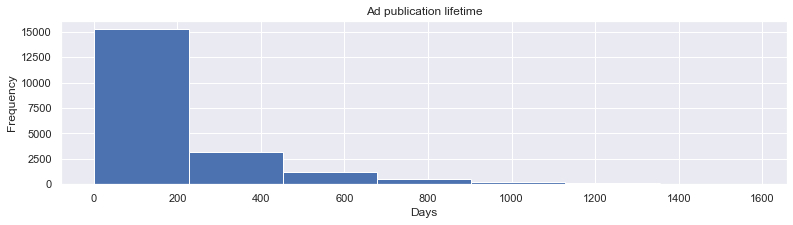

In [85]:
#fill missing values
data['days_listed'].fillna(-1, inplace=True)
#transform days to integer type
data['days_listed'] = data['days_listed'].astype('int')

# Plot the distribution of days in ad list
plt.figure(figsize=(13,3))
plt.hist(data.loc[(data['days_listed']>0),'days_listed'], bins= 7);
plt.title("Ad publication lifetime"); plt.xlabel("Days"); plt.ylabel("Frequency");

The histogram is highly distributed, i.e. there is a lot of data variability. This distribution is natural for the lifetime of such ads.

- **LAST PRICE**

In this column, the price is indicated in dollars, the order of values in this field is thousands.

In [8]:
#last_price
#change the data type to integer in accordance with the meaning of the values
data['last_price'] = data['last_price'].astype('int')

#divide by 1000 to avoid exponental notation
(data['last_price']/1000).describe()

count    23699.000000
mean       130.830976
std        217.740266
min          0.244000
25%         68.000000
50%         93.000000
75%        136.000000
max      15260.000000
Name: last_price, dtype: float64

Price column has an extremely high value of 15 260 000 and a very small value of 244. Let's check if they are anomalies or not.

In [9]:
#check outliers in dataset
(
    data
    .loc[:,['total_area','living_area','bedrooms','last_price']]
    .query('last_price<1000 or last_price>15000000')
    .reset_index(drop=True)
)

,total_area,living_area,bedrooms,last_price
0,109.0,32.0,2,244
1,400.0,250.0,7,15260000


As we can see, a high price value indicates the sale of a large area. A small value is a clear typing error.

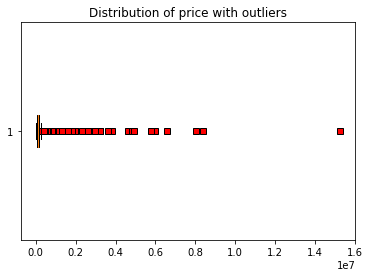

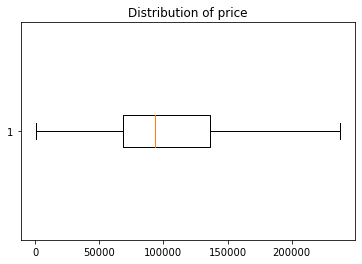

In [10]:
#color and figure of outliers
red_square = dict(markerfacecolor='r', marker='s')
#whisker plot
fig, ax = plt.subplots()
ax.set_title('Distribution of price with outliers')
ax.boxplot(data.last_price, vert=False, flierprops=red_square);

#whisker plot with hidden outlier points
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of price')
ax1.boxplot(data.last_price, vert=False, showfliers=False);

The median is marked by a vertical line inside the box. The whiskers are the two lines outside the box that extend to the highest and lowest observations. 

The charts show that the data distribution is biased towards a significant increase in price and also a significant decrease in the frequency of offers. This creates a large outlier of data, but this distribution is natural for this type of data. Since the maximum outlier is shown by apartments with a large area, for the analysis it is necessary to use the price value in the total area pair.

- **BEDROOMS, STUDIO AND OPEN PLAN DESIGN**

In [11]:
#basic statistical details
data['bedrooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: bedrooms, dtype: float64

We have a minimum value of zero. The number of bedrooms can be zero in cases where the apartment is a studio apartment or an open design apartment.<br>
A studio apartment is basically a self-contained unit and houses everything in the single room space except the bathroom.<br>
In such apartments, the bedroom is allocated with zoning and is not considered a separate room. Therefore, in apartments, such as studios, the number of bedrooms should be zero. The same goes for open design apartments.

There are records in the dataset marked as studio apartment, but having the number of bedrooms equal to one. This may be an error of meaning, due to the fact that the concept of a studio apartment does not have an approved legal definition, which leads to errors in the description.

In [12]:
#studio apartment and apartment with open plan have zero bedrooms
data.loc[((data['is_studio'] == True)|(data['is_open_plan'] == True)), 'bedrooms'] = 0

Also, the dataset contains ordinary apartments in which the number of bedrooms is indicated as zero. As a rule, these are one-room apartments with a separate kitchen. In such apartments, the living room is also considered a bedroom.<br> Let's replace the missing number of bedrooms with the average taken from apartments with a similar footage.

In [13]:
#create dataframe with total_area rounded up to 50
df = data.loc[(data['total_area'].isnull()==False),['total_area','bedrooms']]
df['rounded'] = (np.ceil(df['total_area'] / 50.0) * 50).astype('int')
mean_bedrooms = np.floor(df.pivot_table(index='rounded', values='bedrooms').reset_index())

def get_mean_bedroom(row):
    #this function return mean of bedrooms with the same square area
    return mean_bedrooms.loc[(mean_bedrooms['rounded']==(np.ceil(row['total_area'] / 50.0) * 50).astype('int'))
                             ,'bedrooms']

#number of bedrooms = 0 for studio and open plan ads
df = data.loc[((data['bedrooms'] == 0)&(data['is_studio'] == False)&(data['is_open_plan'] == False))
              , ['total_area','bedrooms']]
#replace wrong number of bedrooms
if df.shape[0] > 0:
    df['bedrooms']= df.apply(get_mean_bedroom, axis=1)
    data.update(df)

"Bedrooms" column is of type float. We will convert the column to an integer, because rooms are counted as whole.

In [14]:
#change float data type to integer
data['bedrooms'] = data['bedrooms'].astype('int')

Let's see how the bulk of apartments are distributed in our dataset.

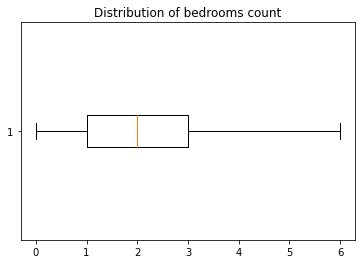

In [15]:
#distribution
#whisker plot with hidden outlier points
fig1, ax1 = plt.subplots()
ax1.set_title("Distribution of bedrooms count")
ax1.boxplot(data.bedrooms, vert=False, showfliers=False);

As we can see on the graph, the number of bedrooms is distributed in the range from 0 (studio apartment) to 6.
Median and Mean values are the same.

Let's see the distribution as a percentage.

In [16]:
#some statistics 
print('Apartments with number of bedrooms more than six :', data.loc[data['bedrooms'] > 6,'bedrooms'].count())
print('Studio apartment:', data.query('is_studio == True & bedrooms == 0')['bedrooms'].count())

Apartments with number of bedrooms more than six : 90
Studio apartment: 149


In [17]:
#dataset
df = data.loc[((data['bedrooms']>=0)&(data['bedrooms']<7))
             ].groupby('bedrooms').agg('count')[['date_posted']]
df= df/df['date_posted'].sum()

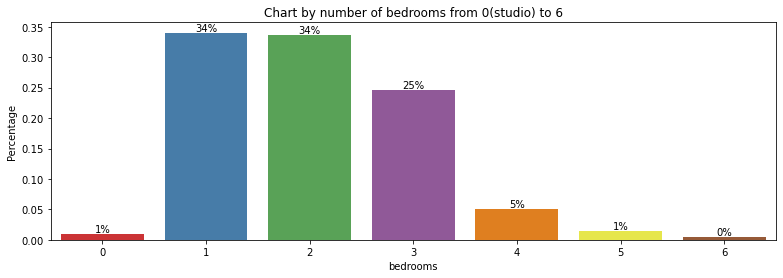

In [18]:
#plot
plt.figure(figsize=(13,4))
ax = sn.barplot(x=df.index, y=df.date_posted, palette="Set1")
ax.set(title='Chart by number of bedrooms from 0(studio) to 6', ylabel='Percentage');
#annotation of bar labels
for p in ax.patches:
        ax.annotate('{:.0%}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), 
                    ha='center', va='bottom', color= 'black')

As we can see, the main number of ads are apartments with one or two bedrooms in approximately equal proportions. With the increase in the number of rooms, the number of offers decreases sharply. studio apartments (0 bedrooms) account for almost 0.9%, while 6-bedrooms - only 0.4%

- **TOTAL AREA**

According to the Housing Code of the Russian Federation - the total area of a residential premises consists of the sum of the area of all parts of such premises, including the area of auxiliary use premises associated with their living in a residential area, with the exception of balconies, loggias, verandas and terraces. <br>
Let's look at the distribution of data on the graph and pay attention to the maximum value.

In [19]:
#basic statistical details
data.total_area.describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

The column does not contain missing values. However, it has a significantly high maximum value.

Let's look at the distribution of the data.

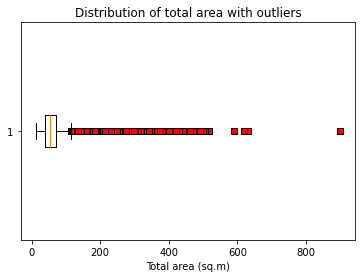

In [20]:
#whisker plot
fig, ax = plt.subplots()
ax.set_title('Distribution of total area with outliers')
plt.xlabel("Total area (sq.m)");
ax.boxplot(data.total_area, vert=False, flierprops=red_square);

There is a large tail of emissions. Let's see them on a separate chart.

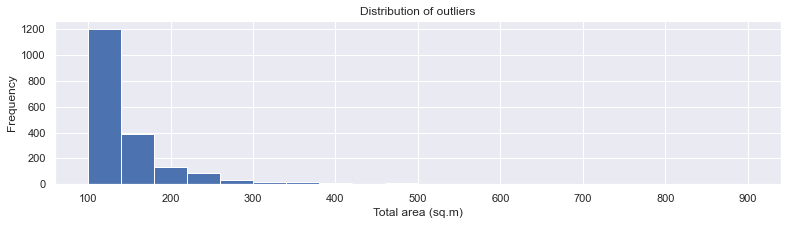

In [86]:
#Plot the distribution of outliers
plt.figure(figsize=(13,3))
plt.hist(data['total_area'], bins= 20, range=(100,900));
plt.title('Distribution of outliers'); plt.xlabel("Total area (sq.m)"); plt.ylabel('Frequency');

Ads with values significantly higher than the average for the sample belong to apartments or premises with a large area. As a rule, there are few such ads and this data may be correct. We will take this spread into account in further analysis.

- **LOCALITY NAME**

This field contains the settlement in which this property is for sale.

In [22]:
#some general statistic of location
df = data['locality_name'].value_counts()
print("Number of location:", df.count());
print("Maximum number of ads in", df.head(1).index[0])

Number of location: 326
Maximum number of ads in Saint Petersburg


There are missing values in this field. Fill them in with the name of the settlement most frequently found in the dataset.

In [23]:
#fill missing value
data['locality_name'].fillna(df.head(1).index[0], inplace = True)

- **BALCONIES**

Let's see how many balconies were noted and how many missing values the dataset has. 

In [24]:
#To see the number of missing values, fill them with -1
data['balconies'].fillna(-1).value_counts()

-1.0    11519
 1.0     4195
 0.0     3758
 2.0     3659
 5.0      304
 4.0      183
 3.0       81
Name: balconies, dtype: int64

In Russian houses, a balcony or loggia is a frequent occurrence. The balcony is a platform outside the facade of the house. Loggia - a room built in or attached to a building. The loggia is usually larger in size and you can equip a full-fledged additional room in it. However, both the balcony and the loggia are not taken into account when calculating the total area of the apartment. <br>
In our dataset, the number of ads with missing values is significant - about 50% and there is no separate attribute indicating the presence of a loggia. Therefore, the reason for missing values may be ambiguity in terms when entering data.

We will group the ads by the location of the apartment and the number of storeys in the building and select similar ads with a filled-in balcony field.

In [25]:
#grouping by settlement and number of storeys of houses available there 
df_balconies = (
    data
    .loc[(data['balconies'] >= 0),['locality_name','floors_total','balconies']]
    .groupby(['locality_name','floors_total','balconies'])
    .agg({'balconies': 'count'})
    )
#rename column "balconies"
df_balconies.columns=['count']
#reset multiple index
df_balconies.reset_index(inplace=True)

Let's replace the missing value with the most common one. If the number of balconies is the same, then we take the smallest number of them.

In [26]:
def get_balcon(row):
#the function returns the number of most common amount of balconies
    #selects a settlement and a building with the same number of storeys
    df_count = (
        df_balconies
        .loc[(df_balconies['locality_name'] == row['locality_name'])&
             (df_balconies['floors_total']  == row['floors_total'])
             ,['balconies','count']]
    ).sort_values('count', ascending=False).head(2)
    
    #the smallest number of balconies
    b_num=0
    b_max=0
    for i in df_count.index:
        if b_max < df_count['count'][i]: 
            b_num = df_count['balconies'][i]
            b_max = df_count['count'][i]
            
    return b_num

#create a dataset with missing data
df = data.loc[data['balconies'].isnull(),['locality_name','floors_total','balconies']]

#the apply method will take some time as a lot of data is being filled
df['balconies'] = df.apply(get_balcon, axis=1)

#update original dataset
data.update(df)

According to the content of the field, convert the data type to integer.

In [27]:
#transform float type to integer
data['balconies'] = data['balconies'].astype('int')

The resulting distribution now looks like this:

In [28]:
#count values in the column and check if Nan values still presented
data['balconies'].fillna(-1).value_counts()

1    9026
2    7773
0    6325
5     307
4     185
3      83
Name: balconies, dtype: int64

The number of entries without balconies remains among the three most common categories. However, now the distribution looks more accurate if we take into account that the dataset contains ads not only for the city, but also for its region.

- **FLOOR and FLOORS TOTAL**

In [29]:
#basic statistical details
data[['floor','floors_total']].describe()

,floor,floors_total
count,23699.000000,23613.000000
mean,5.892358,10.673824
std,4.885249,6.597173
min,1.000000,1.000000
25%,2.000000,5.000000
50%,4.000000,9.000000
75%,8.000000,16.000000
max,33.000000,60.000000


The floor_total column has missing values and the column type is floating point.

We cannot say which value was missed, but definitely the number of floors in the house is no less than the number of storeys. Thus, we use the floor value to replace undefined values.

In [30]:
#convert float type to integer
data['floor'] = data['floor'].astype('int')

#fill missing values
data['floors_total'].fillna(data['floor'], inplace=True)
#convert float type to integer
data['floors_total'] = data['floors_total'].astype('int')

print('Floor mismatch:', data[data['floor'] > data['floors_total']].shape[0])

Floor mismatch: 0


- **CEILING HEIGHT**

Today, a ceiling height of 2.4 meters is considered the minimum norm in Russia, although some buildings may have ceilings 2 meters high. <br>
There is no maximum ceiling height limit, but in practice it is rarely raised above 3.2 meters.

Apartments with higher ceilings can be two or even three levels. These are expensive apartments, most often of the luxury class, and they are rare in the offer. Such apartments have a high cost and their area is not less than 140-200 sq.m.<br>
Apartments in old buildings also have high ceilings. The ceilings in such apartments can be more than 5 meters.

In [31]:
#general statistic information
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Much data is missing. The statistics show that we have a minimum value equal to one and a maximum equal to one hundred.<br>
These are obvious anomalies, so let's look at the distribution of data with a ceiling height of more than 3 meters.

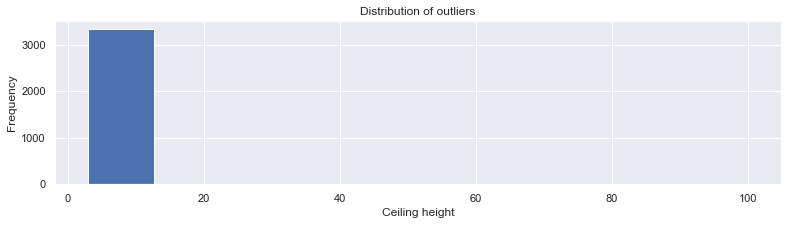

In [87]:
#Plot the distribution of outliers
plt.figure(figsize=(13,3))
plt.hist(data['ceiling_height'].fillna(-1), bins= 10, range=(3,100));
plt.title('Distribution of outliers'); plt.xlabel("Сeiling height"); plt.ylabel('Frequency');

The graph shows that we have an anomaly from 20 to 40. This is an obvious input error, so to normalize these values we multiply them by 0.1. Let's take a range up to 60 to capture errors when entering a ceiling height greater than 4 meters.

In [33]:
#fix the abnormal values
(
    data
    .loc[((data['ceiling_height']>=20)&(data['ceiling_height']<=60))
         ,'ceiling_height']
) = data['ceiling_height']*0.1

All apartments with ceilings over 6 meters, with a total area of less than 100 m2 and more than one storey may also be a manual error. It is also necessary to fix the ceiling height less than two meters, because the building norm for residential premises is more than two meters. To fix the anomalies, let's set the average ceiling height for buildings with such a number of storeys.

In [34]:
#average ceiling height for houses of different storeys
mean_ceil = round(data.groupby('floors_total')['ceiling_height'].mean(),1)

def get_mean_ceil(row):
    #the function returns mean of ceiling height by storey
    return mean_ceil[row['floors_total']]

# ceiling heights above 6 or below 2, total areas less than 100, storeys above 1
df = (
    data
    .loc[( ((data['ceiling_height']>6)&(data['total_area']<100)&(data['floors_total']>1))
         |(data['ceiling_height'].isnull()) | (data['ceiling_height']<2))
         ,['floors_total','ceiling_height']]
) 
#fix the abnormal data
df['ceiling_height']= df.apply(get_mean_ceil, axis=1)
data.update(df)

Fill the remaining missing values with the average ceiling height.

In [35]:
#fill missing values in rows that were not included in the previous selection
data['ceiling_height'].fillna(round(data['ceiling_height'].mean(),1), inplace=True)

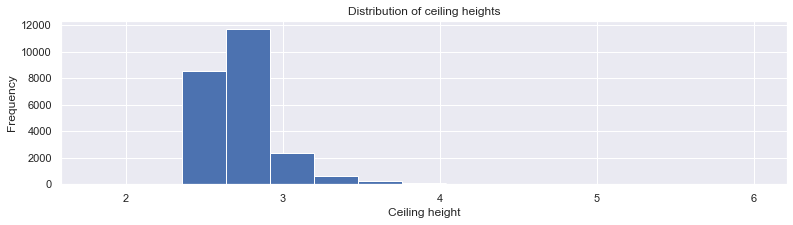

In [88]:
#plot the distribution of ceiling heights
plt.figure(figsize=(13,3))
plt.hist(data['ceiling_height'], bins= 15);
plt.title('Distribution of ceiling heights'); plt.xlabel('Ceiling height'); plt.ylabel('Frequency');

The data obtained is highly distributed, but there are no obvious anomalies.

- **BIKE PARKING**

A bicycle parking space is a designated area for strollers or bicycles. Such premises are often foreseen in the city, in houses of a new type. In older houses, in most cases they are absent.

Therefore, most likely, the values are not missing in the dataset, but indicate that there is no separate parking space for bicycles.<br>
We also convert the boolean type values for the convenience of further analysis.

In [37]:
#bike_parking
#fill missing values 
data['bike_parking'].fillna(False, inplace=True)
#conversion from object to boolean
data.bike_parking = data.bike_parking.astype('bool')

print("Number of ads with bike parking", data[data['bike_parking']==True]['bike_parking'].count())

Number of ads with bike parking 50


- **KITCHEN AREA and LIVING AREA**

According to Russian standards, regardless of the layout of the apartment, there is always an area for the kitchen. Also living area does not include kitchen area.

In [38]:
#general statistic information
data[['kitchen_area','living_area']].describe()

,kitchen_area,living_area
count,21421.000000,21796.000000
mean,10.569807,34.457852
std,5.905438,22.030445
min,1.300000,2.000000
25%,7.000000,18.600000
50%,9.100000,30.000000
75%,12.000000,42.300000
max,112.000000,409.700000


Both columns contain missing values.<br>
To fill them, the best way would be to determine the footage using the percentage of the required area to the total. The larger the sample, the more accurate the values will be. Our sample is large enough, so let's take the average of the entire sample.

In [39]:
#percentage and mean by sample
#living area
ratio_la= round((data['living_area']/data['total_area']).mean(), 1)
#kitchen area
ratio_ka= round((data['kitchen_area']/data['total_area']).mean(), 1)

print("Percentage of living space to total area (mean):", ratio_la)
print("Percentage of kitchen area to total area (mean):", ratio_ka)

Percentage of living space to total area (mean): 0.6
Percentage of kitchen area to total area (mean): 0.2


In [40]:
#fill missing value
data['living_area'].fillna(round(data['total_area']*ratio_la, 1), inplace = True)
data['kitchen_area'].fillna(round(data['total_area']*ratio_ka, 1), inplace = True)

Checking columns with dependent values.<br>
- The sum of the kitchen area and the living area exceeds the total area.

In [41]:
print("Rows where the sum of living area and kitchen area is the bigger than a total area:",
      data.query("(living_area + kitchen_area) > total_area ")['total_area'].count())

Rows where the sum of living area and kitchen area is the bigger than a total area: 138


- The kitchen area is larger than the living area.

In [42]:
print("Rows where living area smaller than kitchen area:",
      data.query("living_area < kitchen_area")['living_area'].count())

Rows where living area smaller than kitchen area: 358


The main reasons why such errors occur are incorrect data entered by the user of the service.<br>
The second reason is the misunderstanding of the term "living area" when it includes secondary premises. <br>
Let's use averages and fix the anomalies.

In [43]:
#select the abnormal data
df = (
    data
    .loc[( (data['living_area']+data['kitchen_area'] > data['total_area'])|
         (data['living_area'] < data['kitchen_area']))
         ,['living_area','kitchen_area','total_area']]
) 
#replace with percentage by total area
df['living_area']= round(df['total_area']*ratio_la , 1)
df['kitchen_area']= round(df['total_area']*ratio_ka, 1)

#apply changes to original dataset
data.update(df)

Check the result

In [44]:
print("Number of ads with correct dependent values:", (
    data
    .query("(living_area <= total_area) & (kitchen_area <= living_area)")['total_area']
    .count()
))

Number of ads with correct dependent values: 23699


Here we are. There is **a final dataset**

In [45]:
#number of rows in original dataset
numrows_orig = data.shape[0]
#drop duplicated rows
data.drop_duplicates(inplace=True)
#number of rows in final dataset
numrows_clean= data.shape[0]

print("The original dataset: ", numrows_orig, "rows. Number of rows after Data preprocessing ", numrows_clean)

The original dataset:  23699 rows. Number of rows after Data preprocessing  23699


### Conclusion <a class="anchor" id="Conclusion_Part_2"></a>

We looked at the contents of the dataset, found and filled in the missing values. trim the dataset of unwanted results Most often, studio apartments and open-plan apartments have such problems - the area of the kitchen is not indicated or the area of the living area is incorrectly indicated. This is because the definition of the layout of such apartments is not properly legalized. However, in regulatory documents there is always a kitchen and it is not taken into account in the living space or has a reduced coefficient when paying for utilities. The second reason why data can be missed is the human factor. This implies not only typos, but also incorrect data entry.

When filling out the data, ambiguities were revealed when filling out data on balconies and loggias, on the height of the ceiling, which in reality has a limit. Also, the data on bicycle parking can be filled in at the stage of dataset formation. All this can be a recommendation for interface developers.

The values showing the distance from the property to the airport, to the center of a given settlement, park and reservoir are informative. For our task, the filling of Nan does not matter, so we will leave them as they are.

The content is filled in so that the dataset is reduced in size due to changes in data types, the quality of the data increased due to filling in the missing values, checks of dependent fields are completed, and if errors occur when checking another dataset (which our task implies), they will be shown.

## Step 3.  Exploratory data analysis <a class="anchor" id="Part_3"></a>
[Go back to the Contents](#contents)

Let's add some columns for further analysis

In [46]:
#calculate and add to the table: the price per square meter
data['price_per_m2'] = round((data['last_price'] / data['total_area'])).astype('int')

In [47]:
#calculate and add to the table: the day of the week, month, and year that the ad was published
data['posted_month'] = pd.DatetimeIndex(data['date_posted']).month
data['posted_year'] = pd.DatetimeIndex(data['date_posted']).year
#add 1 to avoid ambiguity
data['posted_dow'] = pd.DatetimeIndex(data['date_posted']).dayofweek +1

In [48]:
#check the conversion
data.loc[1:10,['date_posted','posted_dow','posted_month','posted_year']].head()

,date_posted,posted_dow,posted_month,posted_year
1,2018-12-04T00:00:00,2,12,2018
2,2015-08-20T00:00:00,4,8,2015
3,2015-07-24T00:00:00,5,7,2015
4,2018-06-19T00:00:00,2,6,2018
5,2018-09-10T00:00:00,1,9,2018


In [49]:
#calculate and add to the table: which floor the apartment is on (first, last, or other)
def get_storey_level(row):
    #the function return label of a floor
    if row['floor'] == 1 :
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

#create a new column "storey_level"
data['storey_level'] = data.apply(get_storey_level, axis=1)

In [50]:
#calculate and add to the table: the ratio between the living space and the total area
#as well as between the kitchen space and the total area
data['ratio_living'] = round((data['living_area'] / data['total_area']), 1)
data['ratio_kitchen']= round((data['kitchen_area'] / data['total_area']), 1)

We have already performed part of the analysis on each component of the dataset above, identified outliers and fixed some errors in dependent elements. Let's see the correlation between the components of the dataset.

### Task 1. Research of the terms of sale of the apartment. <a class="anchor" id="Task1"></a>
[Go back to the Contents](#contents)

_Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"_

In [51]:
print('Mean  : ', round(data[(data['days_listed']>0)].days_listed.mean(), 1) )
print('Median: ',data[(data['days_listed']>0)].days_listed.median() )

Mean  :  180.9
Median:  95.0


The difference between the median and mean shows that our sample is heavily distributed.

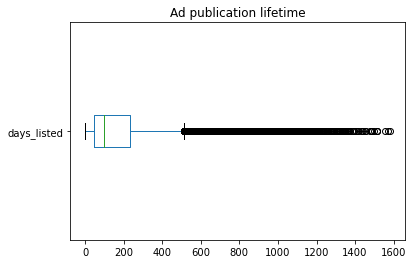

In [52]:
#the distribution of days in ad list
plt.title("Ad publication lifetime"); 
data.loc[(data['days_listed']>0),'days_listed'].plot(kind='box', vert=False);

As we said in the first part above, these values are highly variable and usually have a large tail to the right. Let's see why and what influences this.

This is a comparison of the average selling time based on the number of bedrooms.

,count_ads,sale_mean,sale_median
bedrooms,,,
0,1.0,109.633663,50.0
1,35.0,159.056619,81.0
2,34.0,173.172743,91.0
3,23.0,204.253270,114.0
4,5.0,254.448936,156.0
5,1.0,307.131474,191.0


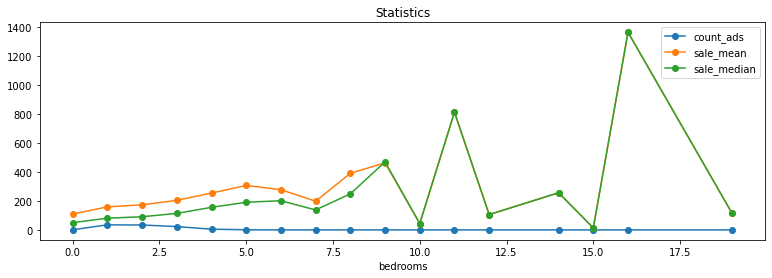

In [53]:
#group by bedrooms
df_saled = (data[(data['days_listed']>0)]
            .groupby('bedrooms')
            .agg({'days_listed': ['count','mean','median']})
            .copy()
           )
df_saled.columns = ['count','sale_mean','sale_median']
#percentage of total ads
df_saled['count_ads'] = round(df_saled['count'] / data[(data['days_listed']>0)].shape[0], 2) * 100

#plot result
fig, ax = plt.subplots(figsize=(13, 4))
df_saled.loc[:,['count_ads','sale_mean','sale_median']].plot(style='o-', title='Statistics', ax=ax);
#the most popular apartments
#the group is more than 1% of total ads
df_saled.loc[(df_saled['count_ads']>=1), ['count_ads','sale_mean','sale_median']]

For apartments with the number of bedrooms from 0 (studio apartment) to 5, the average selling time will be the median value. Advertisements for the sale of apartments with more than 5 bedrooms require additional data to display - there are few such records and the range of values is large.

Let's compare the average selling time depending on the location of the apartment. Our dataset contains ads of the city of St. Petersburg and its region. Therefore, we will have two groups: "St. Petersburg city" and "St. Petersburg region".<br>
The median for the group will be the best choice, since large  apartments create ouliers in our statistics. 

In [54]:
#mean by locality name
#Saint Petersburg city
df_SP_city = (
    data.loc[
    ((data['days_listed']>0)&(data['locality_name']=="Saint Petersburg")),
    ['days_listed'] ]
    ).median()
#Saint Petersburg region
df_SP_region = (
    data.loc[
    ((data['days_listed']>0)&(data['locality_name']!="Saint Petersburg")),
    ['days_listed'] ]
    ).median()

print("The median of group:")
print("Saint Petersburg city   -", df_SP_city[0])
print("Saint Petersburg region -", df_SP_region[0])

The median of group:
Saint Petersburg city   - 95.0
Saint Petersburg region - 96.0


### Conclusion

As we can see, the speed of sale has correlation on the number of bedrooms and has not correlation on the location (city or region). The fastest selling property are studios, the longest selling property are apartments with a large number of bedrooms. On average, the sale takes 3 months.<br>

When can a sale be considered too fast or too slow?<br>
If outliers occur in sampling data of apartments of the selected type and equally located, then such sales can be considered abnormal - too fast or too slow, depending on the location of the outlier on the graph.

### Task 2. Research on rare and unusual values. <a class="anchor" id="Task2"></a>
[Go back to the Contents](#contents)

_Remove rare and outlying values and describe the specific details you've discovered._

In statistics, an outlier is a data point that differs significantly from other observations. We identified and corrected some of the anomalies and outliers in the first part of this book.

We still have 4 fields in the dataset that have the extreme values and excess variability:<br>
days_listed <br>
last_price <br>
bedrooms <br>
total_area <br>
Outliers in these values are explained by the presence of a certain percentage of large-area apartments in the dataset. As a rule, these are real data, but they mean expensive housing. The price for such premises is much higher, and the sale time is correspondingly higher.<br>
To determine which price is critically different from others, we will also use the parameter "price per square meter".

Let's filter the dataset and compare the distribution with the original dataset.

For the bedroom parameter, we take the result of the previous calculation and select apartments that make up more than 1% of the total number of apartments sold. These will be apartments from 0 (studio) to 5-bedroom.<br>
For the rest of the parameters, we can use a whisker plot. It will show which values are outliers, and which we can take as a basis for analysis.

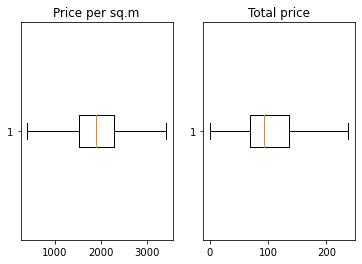

In [55]:
#whisker plot with hidden outlier points
plt.subplot(1,2,1)
plt.title('Price per sq.m')
plt.boxplot(data.price_per_m2, vert=False, showfliers=False);

plt.subplot(1,2,2)
plt.title('Total price')
plt.boxplot(round(data.last_price/1000,1), vert=False, showfliers=False);

Base dataset:
- price per square meter less than 3500
- sale price less than 250 thousand

We will limit the maximum values of sale days and find the values of the total area, normally distributed in the dataset.

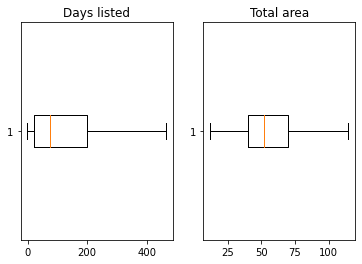

In [56]:
#whisker plot with hidden outlier points
plt.subplot(1,2,1)
plt.title('Days listed')
plt.boxplot(data.days_listed, vert=False, showfliers=False);

plt.subplot(1,2,2)
plt.title('Total area')
plt.boxplot(round(data.total_area,1), vert=False, showfliers=False);

Base dataset:
- sales time less than 500 days
- the total area of the apartment is less than 170 sq m 

We will also limit the dataset to only completed transactions.

In [57]:
#get rid outliers from dataset
#Base dataset:
df_filtered = data.query(
    #completed transactions and sales time less than 500 days
    "(days_listed > 0 and days_listed < 500)" +
    #avoid outliers of minimum values and limit variance of maximum values  
    " and (last_price > 1000 and last_price < 250000)" +
    #ads of bedrooms with percentage more than 10% by dataset
    " and (bedrooms < 6)" +
    #price per square meter less than 3500
    " and (price_per_m2 < 3500)"+ 
    #limit variance of maximum values
    " and (total_area < 170)"
                     )
print("Number of rows in the filtered dataset: ", df_filtered.shape[0])

Number of rows in the filtered dataset:  17511


Let's compare the distribution of the price per square meter in the original sample and the filtered dataset.

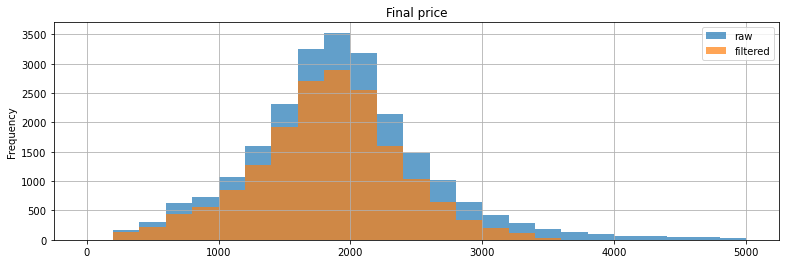

In [58]:
#original sample
fig, ax = plt.subplots(figsize=(13, 4))
ax = data.plot(kind='hist', y='price_per_m2', range=(0, 5000)
     , bins=25, linewidth=5, alpha=0.7, label='raw', ax=ax)
#filtered dataset
df_filtered.plot(kind='hist', y='price_per_m2', range=(0, 5000), title='Final price'
     , bins=25, linewidth=5, alpha=0.7, label='filtered', ax=ax, grid=True, legend=True);

The successful sale of an apartment depends on many factors. In addition, as we saw earlier, filling out sales ads often contains erroneous data associated with typos and information that is initially incorrect or that the customer does not have. This generates significant outliers that negatively affect the accuracy of the analysis. Having got rid of outliers, we got an average distribution.

### Task 3. Which factors have had the biggest influence on an apartment’s value? <a class="anchor" id="Task3"></a>
[Go back to the Contents](#contents)

The most valuable apartments are those that sell quickly and have a high price tag.

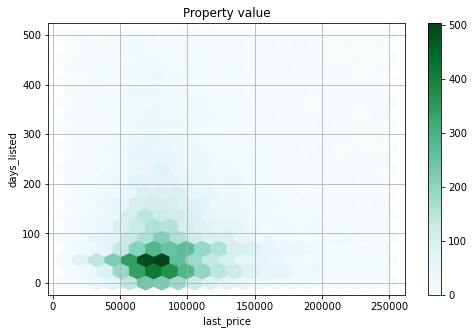

In [59]:
#apartment’s value == high price, fast sell
df_filtered.plot(x='last_price', y='days_listed', kind='hexbin', gridsize=20, figsize=(8, 5)
                 , sharex=False, grid=True, title="Property value");

The graph shows that in our dataset these are apartments with prices ranging from 50,000 to 100,000, which are sold in less than 100 days.
Let's see what parameters have an impact.

In [60]:
#dataset of the most valuable apartments
df_hi_value = df_filtered.loc[((df_filtered['days_listed'] < 100)&
                               (df_filtered['last_price'] > 50000)&(df_filtered['last_price'] < 100000) )
                              ,:]

A <a href="https://python-graph-gallery.com/2d-density-plot/">2D density plot or  2D histogram</a> is an extension of the well known histogram. It shows the distribution of values in a data set across the range of two quantitative variables. It is really useful to avoid over plotting in a scatterplot. 

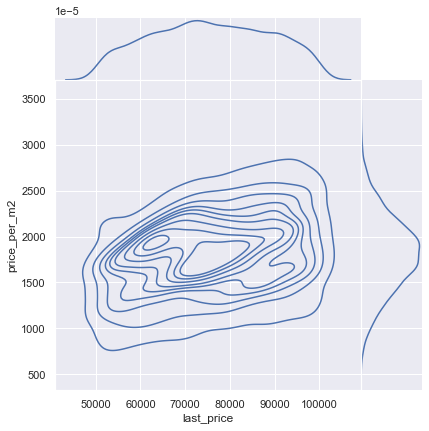

In [89]:
#the relationship between two numerical variables
ax = sn.jointplot(x=df_hi_value['last_price'], y=df_hi_value['price_per_m2'], kind="kde", height=6, space=0);

Relationships here are positive, moderate, linear.

To find the relationship between a categorical variable and a numeric variable, we use a violin plot.<br>
A <a href="https://seaborn.pydata.org/generated/seaborn.violinplot.html">violin plot</a> plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution. 

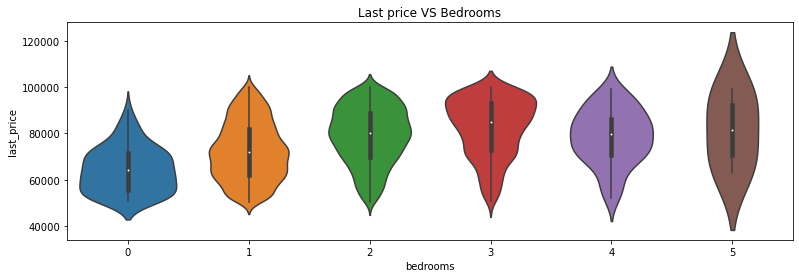

In [62]:
#relationship between price and number of bedrooms
#for numeric and categorical variables we use violin plot
plt.figure(figsize=(13,4))
ax = sn.violinplot(x=df_hi_value["bedrooms"], y=df_hi_value['last_price']).set_title("Last price VS Bedrooms")

Relationships here are positive, nonlinear.

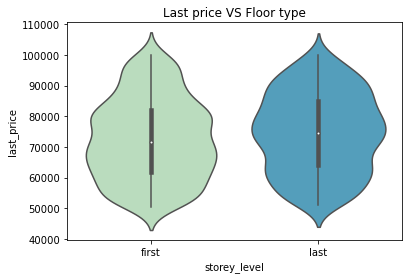

In [63]:
#relationship between price and floor type
df = (
    df_hi_value
    .loc[((df_hi_value['storey_level'] == 'first')|(df_hi_value['storey_level'] == 'last'))
         ,['last_price','storey_level']]
)
#for numeric and categorical variables we use violin plot
plt.figure(figsize=(6,4))
ax = sn.violinplot(x=df["storey_level"], y=df['last_price'], palette='GnBu').set_title("Last price VS Floor type");

Having checked various graphs, it is possible to say that in this case, the relationship clearly shows a violin plot.<br>
So, relationship here is positive, linear.

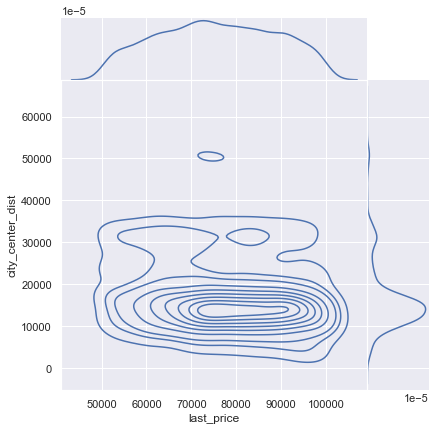

In [79]:
#relationship between price and city center distance
df = (
    df_hi_value
    #remove underfined values and outliers
    .loc[((df_hi_value['city_center_dist'].isnull() == False)&(df_hi_value['city_center_dist']<40000))
         ,['last_price','city_center_dist']]
)

#a relationship between two numerical variables
sn.set(style="darkgrid")
#to avoid overplotting we use jointplot 2D histogram
ax = sn.jointplot(x=df_hi_value['last_price'], y=df_hi_value['city_center_dist'], kind="kde", height=6, space=0);

No relationships.

Let's make some graphs

In [65]:
def make_plot(dataset, title):
    #the function makes plot line
    dataset.columns = ['average_price']
    #plot
    dataset.plot(style="-o", color="green", figsize=(13,4)).set_title(title);

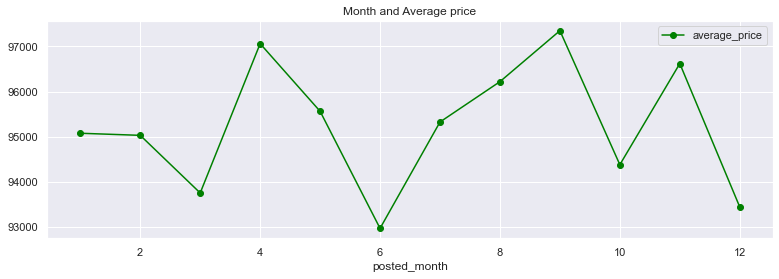

In [80]:
#relationship Month and Average price
monthprice = (df_filtered.groupby('posted_month').agg({'last_price': ['mean']}))
make_plot(monthprice, 'Month and Average price')

The histogram shows the increase in the average selling price in April and September-October. In June, we see a significant decline in prices.

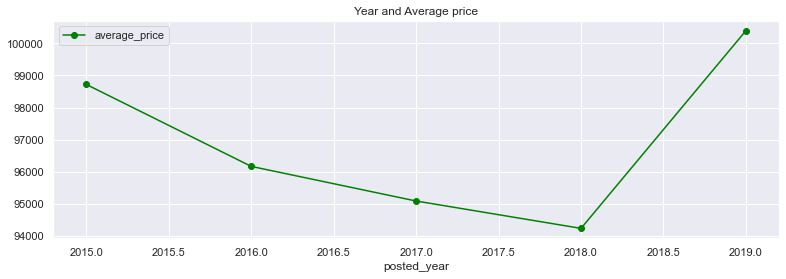

In [81]:
#relationship Year and Average price
yearprice = (df_filtered.groupby('posted_year').agg({'last_price': ['mean']}))
make_plot(yearprice, 'Year and Average price')

We see a decrease in the average price from 2015 to 2018, then a sharp increase, and the price of 2019 is even higher than in 2015.

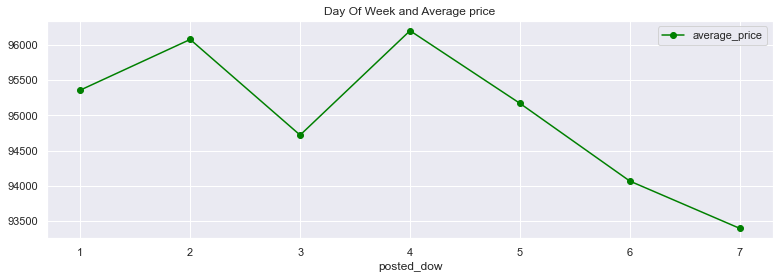

In [82]:
#relationship Day Of Week and Average price
dowprice = (df_filtered.groupby('posted_dow').agg({'last_price': ['mean']}))
make_plot(dowprice, 'Day Of Week and Average price')

In any year and any month, the most expensive apartments are put up for sale on Tuesday and Thursday, the cheapest ones are on Sunday.

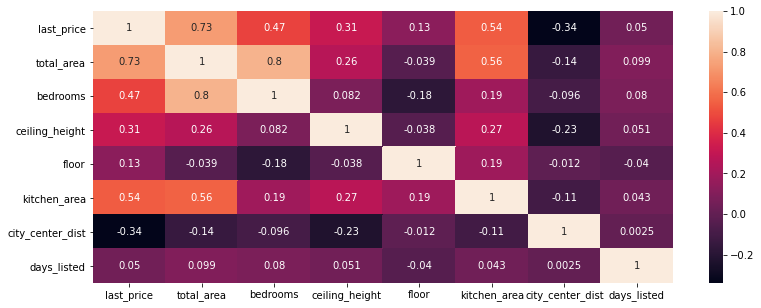

In [69]:
#correlation matrix
corrMatrix = df_filtered.loc[:,['last_price','total_area','bedrooms','ceiling_height','floor','kitchen_area',
                          'city_center_dist','date_posted','days_listed'] ].corr()
#heatmap chart
plt.figure(figsize=(13,5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

There is a strong correlation between Last price and Total area, Bedrooms, Kitchen area. Obviously, Total area has strong correlation with Bedrooms and Kitchen area. Other connections are not as strong or absent.

In [70]:
#the 10 places with the largest number of ads
(
    df_filtered
    .loc[:,['locality_name','price_per_m2'] ]
    .groupby('locality_name')
    .agg({'locality_name': ['count'],'price_per_m2':['mean']})
).sort_values([('locality_name', 'count')], ascending=False).head(10)

,locality_name,price_per_m2
,count,mean
locality_name,,
Saint Petersburg,11248,2071.486842
Murino village,517,1719.680851
Shushary village,385,1558.771429
Vsevolozhsk,307,1334.885993
Kolpino,291,1489.986254
Pargolovo village,286,1787.206294
Kudrovo village,265,1851.713208
Pushkin,263,1993.083650


In [71]:
#locations with the highest and lowest housing prices.
df = (
    df_filtered.loc[:,['locality_name','last_price']]
    .groupby('locality_name')
    .agg({'last_price':['mean']})
).sort_values([('last_price', 'mean')], ascending=False)

df.iloc[[0,-1]]

,last_price
,mean
locality_name,
village Repino,161674.0
village Vakhnova Kara,9000.0


### Task 4. Determination of the city center.<a class="anchor" id="Task3"></a>
[Go back to the Contents](#contents)

_This task is to pinpoint which area is considered to be downtown._

Let's collect the ads for the sale of apartments in the city center in St. Petersburg.

In [72]:
#area is considered to be downtown
df_dntown = df_filtered.loc[((df_filtered['locality_name']=="Saint Petersburg")&
                             #remove underfined values and outliers
                            (df_filtered['city_center_dist'].isnull() == False)&
                            (df_filtered['city_center_dist']<40000)),
                            ['city_center_dist','last_price','price_per_m2']
                           ].copy()
df_dntown['dist_km'] = np.ceil(df_dntown['city_center_dist']/1000).astype('int')

Let's calculate the average price per square meter of the total area for each kilometer.

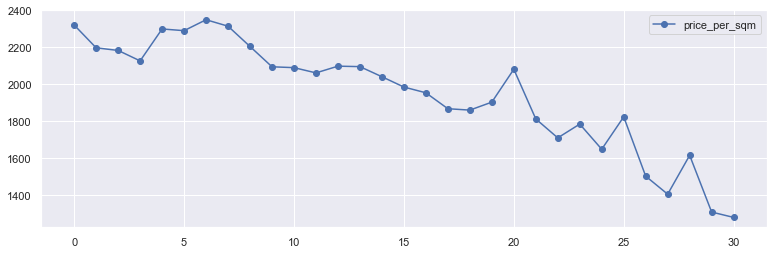

In [83]:
#the average price per square meter
pricelist = (df_dntown.groupby('dist_km').agg({'price_per_m2': ['mean']})).reset_index()
pricelist.columns = ['distance_in_km','price_per_sqm']
#plot
pricelist.loc[:,['price_per_sqm']].plot(style="-o", figsize=(13,4));

The histogram shows that the price line rises significantly at a distance of 4 to 7 kilometers. This indicates area of the downtown.

Our next task is: _Select a segment of apartments in the downtown. Analyze this area and examine the parameters_ <br>

In [74]:
#Analyze a segment of apartments in the downtown
df_47km = (df_dntown.loc[((df_dntown['dist_km']>=4)&(df_dntown['dist_km']<=7))]
          .join(data.loc[:,['total_area','bedrooms','ceiling_height','floor','kitchen_area'
                            ,'days_listed','posted_month','posted_dow','posted_year']], how='left')
         ).reset_index()

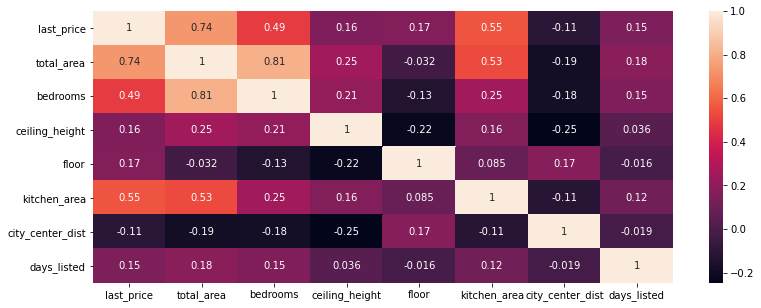

In [75]:
corrMatrix = df_47km.loc[:,['last_price','total_area','bedrooms','ceiling_height','floor','kitchen_area',
                          'city_center_dist','days_listed'] ].corr()
plt.figure(figsize=(13,5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

The correlation matrix shows that there is a correlation between price and total area, number of bedrooms and kitchen size. We see little correlation with ceiling height, but this could be due to the fact that downtown apartments often have above average ceiling heights. Interestingly, the floor does not correlate or correlates weakly with other parameters. Perhaps this parameter is underestimated by the service customers. The number of rooms correlates well with the total area. It should be noted that the distance to the nominal city center does not correlate with other parameters. Selling time is weak, but positively correlates with almost all parameters, except for the floor and the distance to the city center.

Let's see the correlation between last price and the date the ad was published.

In [76]:
#dataset for a histogram
df = df_filtered.loc[:,['date_posted','last_price']].copy()
#get date in format year-month
df['ads_date'] = df['date_posted'].str[0:7]

#relationship Posted Date and Average price
#dataset for plotting
dateprice = (df.groupby(['ads_date']).agg({'last_price': ['mean']}))
dateprice.columns=['avg_price']
dateprice.reset_index(inplace=True)

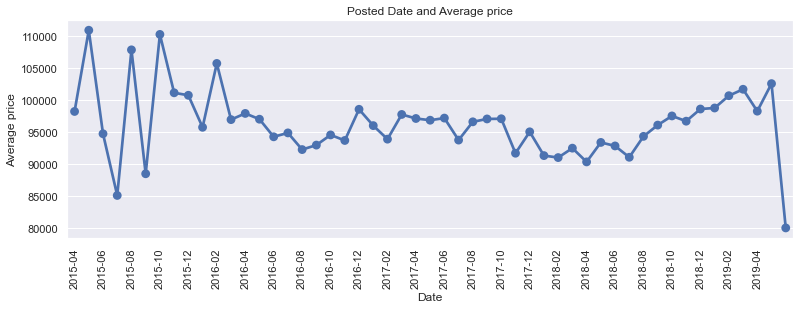

In [84]:
plt.figure(figsize=(13,4))

xn= range(dateprice.shape[0])
ax= sn.pointplot(data=dateprice, x="ads_date", y="avg_price"
                ).set(xlabel="Date", ylabel="Average price"
                      , title='Posted Date and Average price');
plt.xticks(np.arange(min(xn), max(xn), 2), dateprice['ads_date'][1:50:2], rotation='vertical');

The graph shows a strong price fluctuation in 2015, for example, it may be due to the ad service itself. Since 2016, prices have fluctuated and have steadily increased in value since 2018. The fall in May 2019 is possibly due to insufficient data during this period.

As we have seen, the real estate market is moving forward and is clearly growing since 2018. Perhaps the 2018 FIFA World Cup in Russia increased the attractiveness of real estate as well. Perhaps such results are associated with social processes in society.

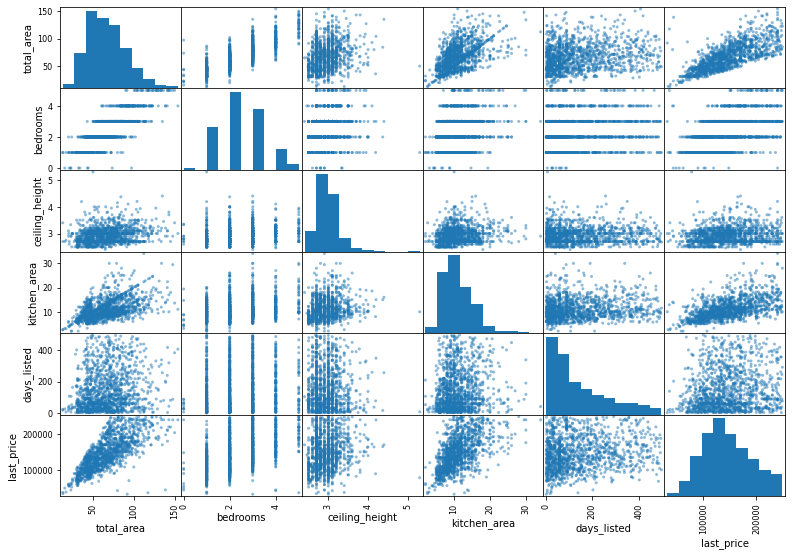

In [78]:
#distribution
pd.plotting.scatter_matrix(
    df_47km.loc[:,['total_area','bedrooms','ceiling_height','kitchen_area','days_listed','last_price']]
    , figsize=(13, 9));

Downtown apartments are mostly over 50 square meters. They are predominantly 2- and 3-bedrooms and there are practically no studio apartments. The average height of the ceilings is about 3 meters. They usually have a kitchen area about 10 sq.meters. The average price of such apartments is about 150 thousand dollars, but the sale time is variable.

If we compare apartments in the downtown with the full sample, which we examined above, we will see that the cost of apartments in the city center increases with the same parameters of apartments in other areas. Obviously it has to do with location. Both the developed infrastructure and the social significance of the downtown play a role here.<br>
The fact that the ceilings are of medium height may indicate typical buildings in the area. The high cost of apartments also affects the number of bedrooms - inexpensive studio with a small total area are practically absent in the downtown, although in other areas they are one of the most frequently and successfully sold apartments.<br>
We saw that the price of apartments on the first floor is lower than on the top floor. The sales times of apartments in the downtown are also distributed as in the general sample.<br>
Perhaps there is an influence of some other parameters, for example, the good condition of the apartment, house, fresh renovation, etc. More precisely it can be determined by collecting additional parameters and subsequent analysis.

## General conclusion.<a class="anchor" id="General_Conclusion"></a>

[Go back to the Contents](#contents)

This book analyzed an archive of sales ads for properties in St. Petersburg, Russia, and the surrounding areas collected over the past few years by a real estate agency. <br>
Parameter analysis had to be performed so that an automated system could be created to detect anomaly and fraudulent activity.

In our book, Data preparation is done in such a way that when the original dataset is changed, the data quality improves, and obvious anomalies are removed.

Then, we normalized the sample and found that we are mainly talking about apartments sold in less than 1.3 years with a price of 250 thousand dollars, up to 5 bedrooms, with a price per square meter less than 3500 dollars and a total area of less than 170 square meters.

We identified the segment of apartments that set up the downtown of St. Petersburg city and found significant parameters and relationships that define this segment. We also found patterns inherent in the downtown segment and the general sample in the same way.